<a href="https://colab.research.google.com/github/lee-j-j/LJJ/blob/main/ex08_MLP_%ED%99%9C%EC%84%B1%ED%99%94%2C_%EC%B5%9C%EC%A0%81%ED%99%94_%ED%95%A8%EC%88%98_%EB%B9%84%EA%B5%90_%ED%8C%A8%EC%85%98%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 이미지 다루는 실습을 진행해보자!
- 패션 소품에 대한 클래스 값을 가진 데이터를 활용하여 다중분류 신경망을 생성해보자!
- 활성화, 최적화 함수 조합을 accuracy를 통해 비교해보자.

In [1]:
# 환경셋팅

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential # 신경망 뼈대 구축
from tensorflow.keras.layers import Dense # 층 내용 정의하는 도구
# 텐서플로우 안에 있는 데이터 - 패션 데이터
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# 데이터 불러오기
data = fashion_mnist.load_data()
data
# data = ((3차원 배열, 1차원 배열), (3차원 배열, 1차원 배열))

4422102/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
a,b = 3,6
# 3,6 → (3,6) packing
print(a, b) # unpacking

3 6


In [4]:
# data = ((3차원 배열, 1차원 배열), (3차원 배열, 1차원 배열))
# data = ((훈련 이미지, 훈련 답),...,((테스트 이미지),테스트 답))
# train, test = fashion_mnist.load_data() # 알아서 train, test 나뉘어서 담김
# train → (X_train, y_train), test → (X_test, y_test)
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
print('훈련셋 크기 : ', X_train.shape, y_train.shape)
print('테스트셋 크기 : ', X_test.shape, y_test.shape)

훈련셋 크기 :  (60000, 28, 28) (60000,)
테스트셋 크기 :  (10000, 28, 28) (10000,)


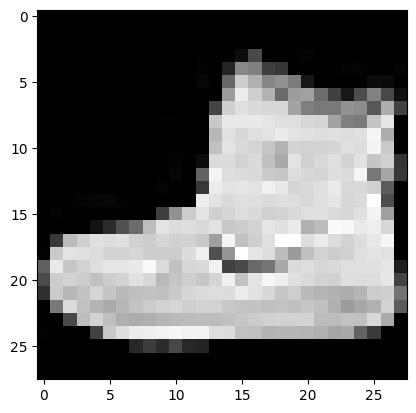

9


In [9]:
# 이미지 출력해보기
# 2차원 배열 → 이미지 1장
# 흑백계열 이미지 : 0~255 (0:검은색, 255:흰색)
plt.imshow(X_train[0], cmap = "gray")
plt.show()
# 답 데이터 출력 y_train 0번째
print(y_train[0]) # 9 : Ankle boot

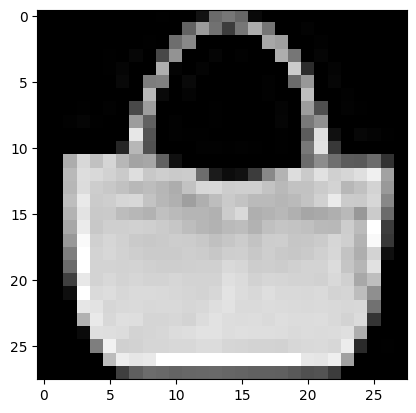

8


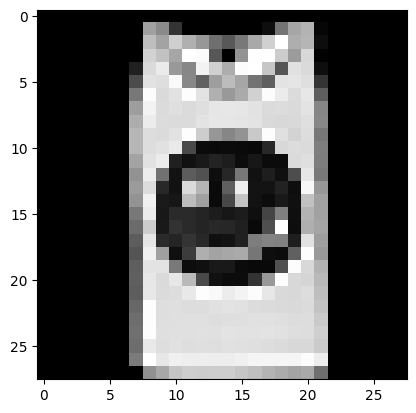

0


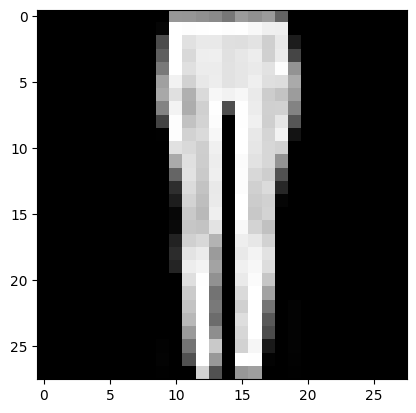

1


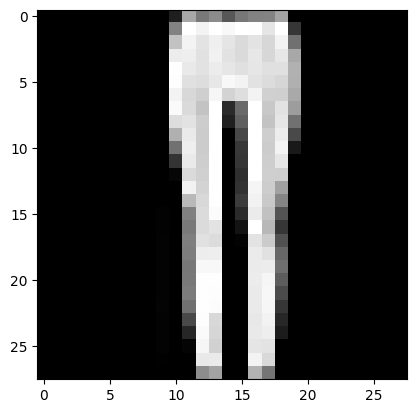

1


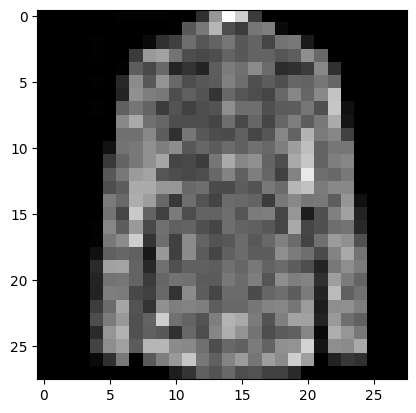

6


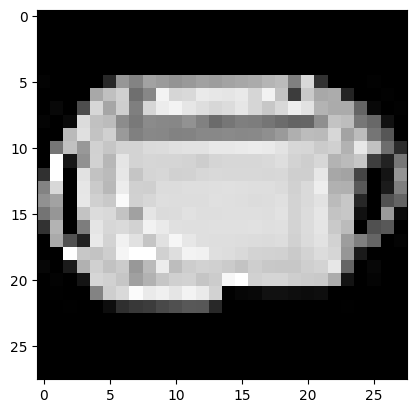

8


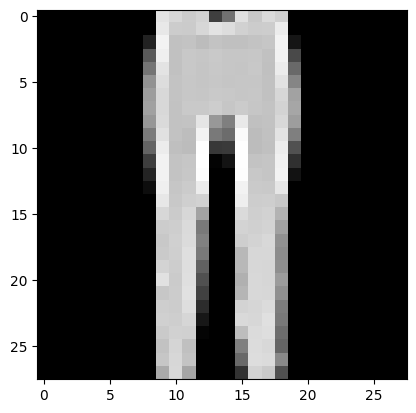

1


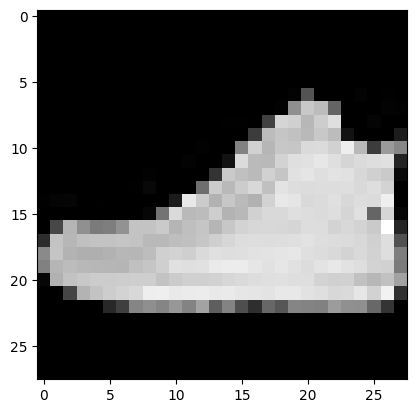

9


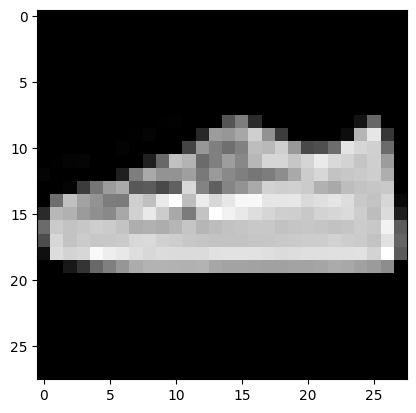

7


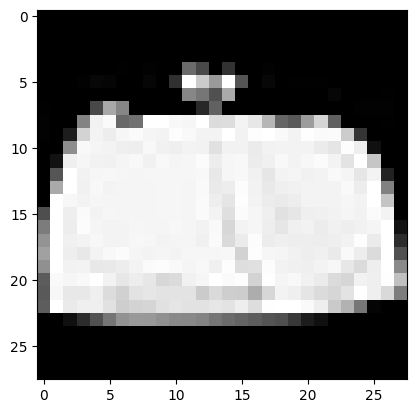

8


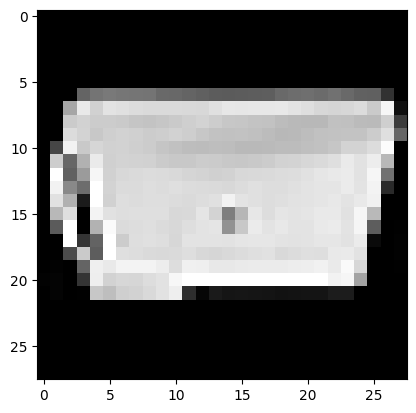

8


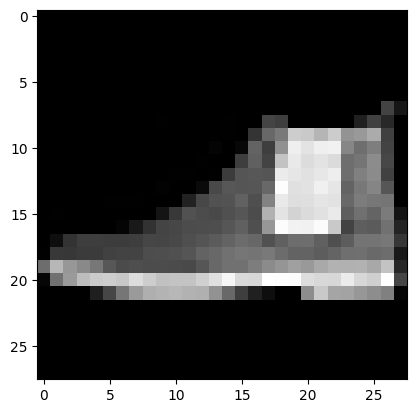

9


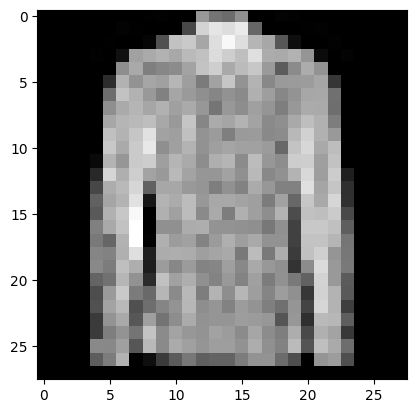

6


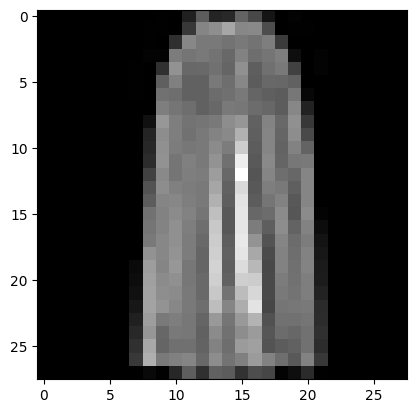

6


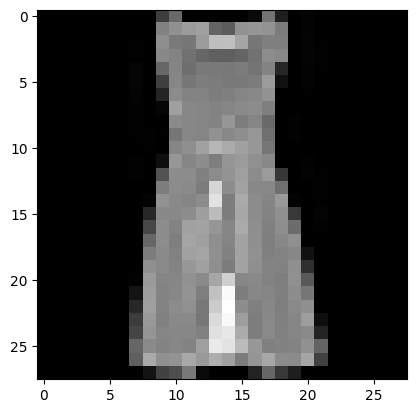

3


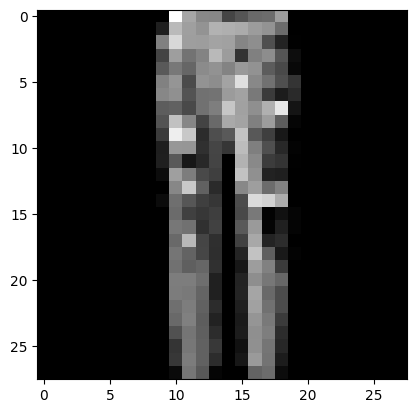

1


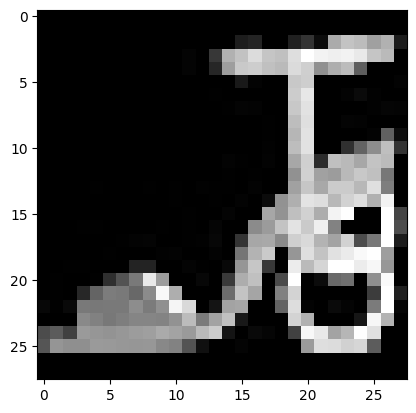

5


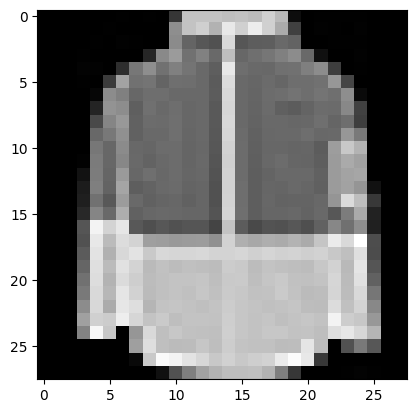

4


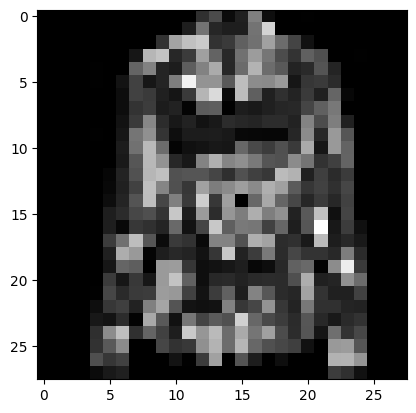

6


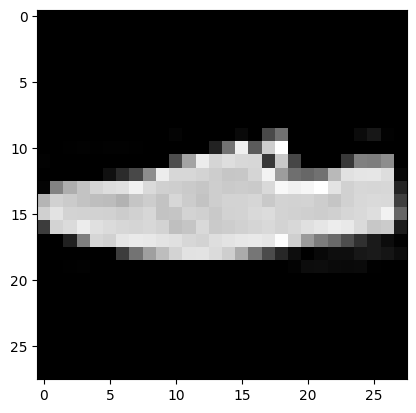

7


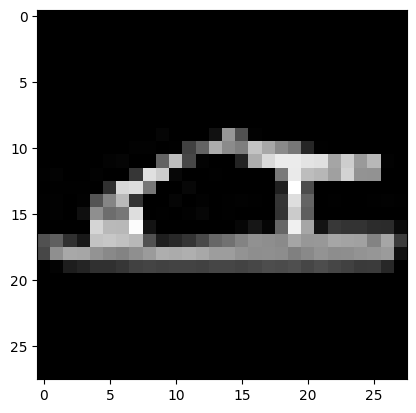

5


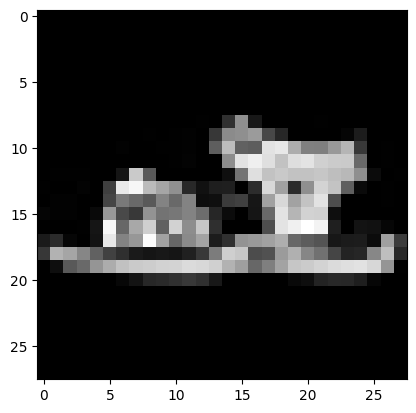

5


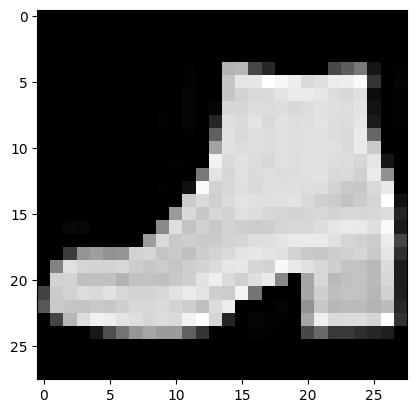

9


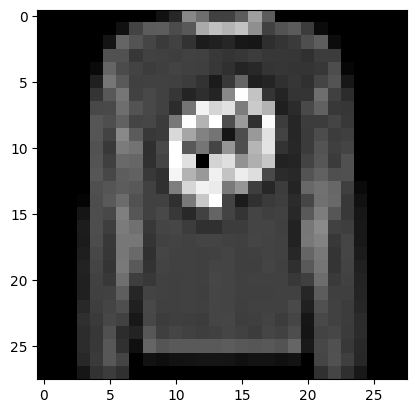

2


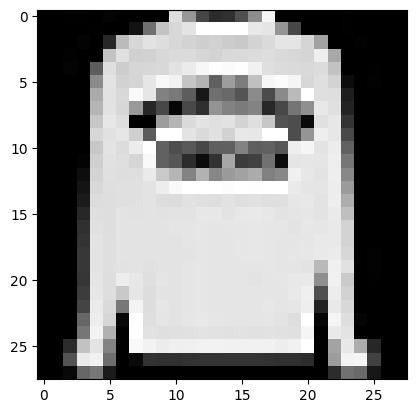

2


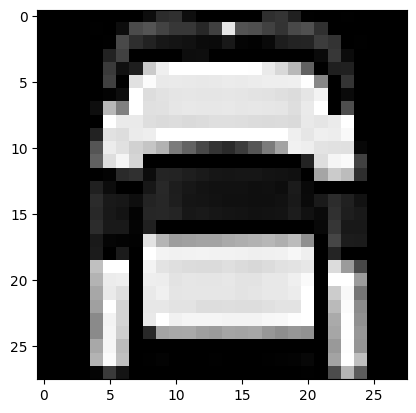

2


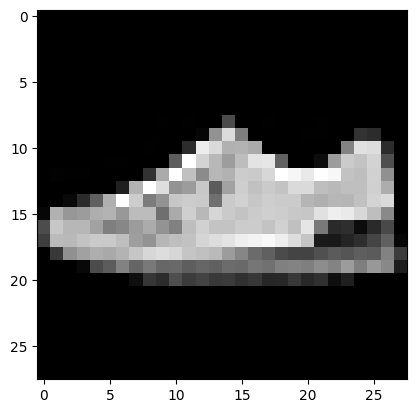

7


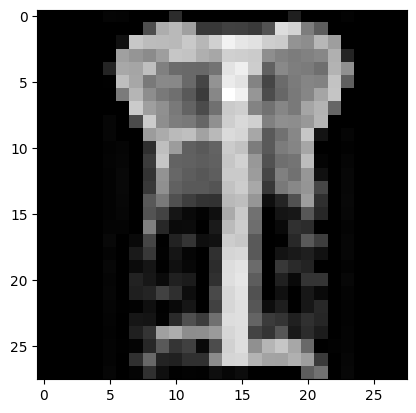

6


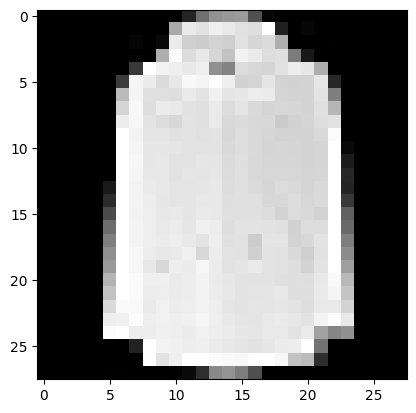

4


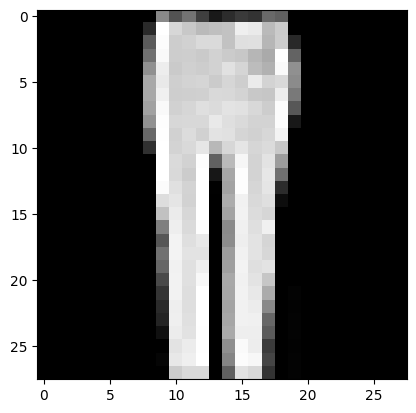

1


In [13]:
for i in range(100,130) :
  plt.imshow(X_train[i], cmap = "gray")
  plt.show()
  print(y_train[i])

In [17]:
# 다중분류
np.unique(y_train).size # 10개의 클래스, 다중분류 출력층 units = 클래스의 개수
np.unique(y_train, return_counts = True) # 데이터의 다양성이 유지되고 있음 (각 클래스마다 동일하게 6000개씩)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [27]:
# 다중분류 → 답 데이터는 원핫인코딩 (2가지 방법)
# 1. pandas → pd.get_dummies(대상) → df
# 2. tensorflow.keras.utils → to_categorical(대상) → array
# y_train_oh = pd.get_dummies(y_train) # pandas → df
from tensorflow.keras.utils import to_categorical
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

# 크기확인
print('트레인 원핫 : ', y_train_oh.shape)
print('테스트 원핫 : ', y_test_oh.shape)

트레인 원핫 :  (60000, 10)
테스트 원핫 :  (10000, 10)


#### 활성화 함수, 최적화함수 별 비교
- 1. 중간층 - 활성화 : sigmoid, 최적화 : sgd
- 2. 중간층 - 활성화 : relu, 최적화 : sgd
- 3. 중간층 - 활성화 : relu, 최적화 : adam
  - 각각의 신경망을 설계하고 결과를 비교해보자!

In [28]:
# 2차원 배열(이미지 1장) → mlp 모델 (1차원 받아들임)
# 2차원 배열 → 1차원 배열 : Flatten()
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam

In [35]:
# 모델 생성
# 활성화 함수, 최적화 함수를 매개변수로 연결하는 모델 생성 함수 정의
def create_model(acti_f, opti_f):
  # 뼈대 구축
  model = Sequential()

  # 층 쌓기
  # 전에 데이터 전처리 (2차원 → 1차원)
  model.add(Flatten(input_shape = (28,28))) # 1차원 데이터 연결
  model.add(Dense(units = 400, activation = acti_f))
  model.add(Dense(units = 200, activation = acti_f))
  model.add(Dense(units = 100, activation = acti_f))
  model.add(Dense(units = 10, activation = 'softmax'))

  # 컴파일 (loss, 최적화 함수, 정확도 지표)
  model.compile(loss = 'categorical_crossentropy', optimizer = opti_f, metrics = ['accuracy'])

  # 리턴 모델
  return model

In [36]:
# fit 함수 정의
# 모델명만 넣어주면 fit 진행하는 코드 작성
# 교차검증 데이터 연결 30% 교차검증 데이터 활용
# 문제, 답, 반복횟수 30, batch_size = 64

def fit_model(estimator) :
  h = estimator.fit(X_train, y_train_oh, epochs = 30, batch_size = 64, validation_split = 0.3)
  return h # 학습 현황 반환

In [37]:
# 1. sig + sgd
model1 = create_model("sigmoid", SGD(learning_rate = 0.01))
h1 = fit_model(model1)
h1

Epoch 1/30
657/657 [==============================] - 4s 5ms/step - loss: 2.1321 - accuracy: 0.4712 - val_loss: 1.9274 - val_accuracy: 0.5714
Epoch 2/30
657/657 [==============================] - 3s 4ms/step - loss: 1.6759 - accuracy: 0.6318 - val_loss: 1.4390 - val_accuracy: 0.6713
Epoch 3/30
657/657 [==============================] - 4s 6ms/step - loss: 1.2623 - accuracy: 0.6745 - val_loss: 1.1063 - val_accuracy: 0.6795
Epoch 4/30
657/657 [==============================] - 3s 5ms/step - loss: 1.0088 - accuracy: 0.7008 - val_loss: 0.9246 - val_accuracy: 0.7337
Epoch 5/30
657/657 [==============================] - 3s 4ms/step - loss: 0.8694 - accuracy: 0.7260 - val_loss: 0.8215 - val_accuracy: 0.7331
Epoch 6/30
657/657 [==============================] - 3s 4ms/step - loss: 0.7827 - accuracy: 0.7454 - val_loss: 0.7504 - val_accuracy: 0.7476
Epoch 7/30
657/657 [==============================] - 3s 5ms/step - loss: 0.7195 - accuracy: 0.7648 - val_loss: 0.6954 - val_accuracy: 0.7726
Epoch 

In [34]:
# 2. relu + sgd
model2 = create_model('relu', SGD(learning_rate = 0.01))
h2 = fit_model(model2)
h2

Epoch 1/30
657/657 [==============================] - 4s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008
Epoch 2/30
657/657 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008
Epoch 3/30
657/657 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008
Epoch 4/30
657/657 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008
Epoch 5/30
657/657 [==============================] - 4s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008
Epoch 6/30
657/657 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008
Epoch 7/30
657/657 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008
Epoch 8/30
657/657 [============================

In [42]:
# 3. relu + adam
model3 = create_model('relu', Adam (0.001))
h3 = fit_model(model3)
h3

Epoch 1/30
657/657 [==============================] - 7s 5ms/step - loss: 3.2580 - accuracy: 0.7537 - val_loss: 0.8980 - val_accuracy: 0.7863
Epoch 2/30
657/657 [==============================] - 3s 5ms/step - loss: 0.5953 - accuracy: 0.8192 - val_loss: 0.5594 - val_accuracy: 0.8186
Epoch 3/30
657/657 [==============================] - 5s 7ms/step - loss: 0.4765 - accuracy: 0.8391 - val_loss: 0.4499 - val_accuracy: 0.8471
Epoch 4/30
657/657 [==============================] - 3s 5ms/step - loss: 0.4187 - accuracy: 0.8543 - val_loss: 0.4817 - val_accuracy: 0.8392
Epoch 5/30
657/657 [==============================] - 3s 4ms/step - loss: 0.3982 - accuracy: 0.8605 - val_loss: 0.4507 - val_accuracy: 0.8438
Epoch 6/30
657/657 [==============================] - 3s 5ms/step - loss: 0.3846 - accuracy: 0.8629 - val_loss: 0.3909 - val_accuracy: 0.8636
Epoch 7/30
657/657 [==============================] - 4s 6ms/step - loss: 0.3656 - accuracy: 0.8690 - val_loss: 0.4444 - val_accuracy: 0.8534
Epoch 

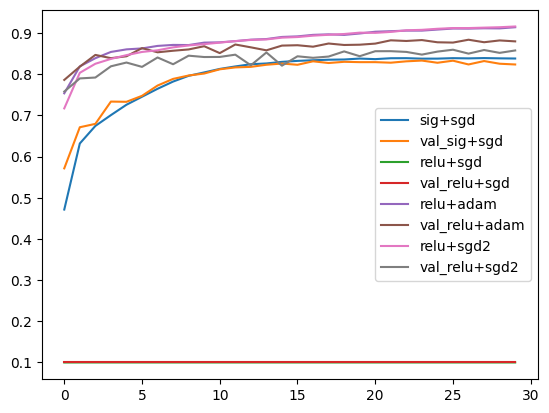

In [50]:
# 시각화
# acc 선 그래프로 표현해보기
plt.plot(h1.history['accuracy'], label = 'sig+sgd')
plt.plot(h1.history['val_accuracy'], label = 'val_sig+sgd')

plt.plot(h2.history['accuracy'], label = 'relu+sgd')
plt.plot(h2.history['val_accuracy'], label = 'val_relu+sgd')

plt.plot(h3.history['accuracy'], label = 'relu+adam')
plt.plot(h3.history['val_accuracy'], label = 'val_relu+adam')

# plt.plot(h4.history['accuracy'], label = 'relu+sgd2')
# plt.plot(h4.history['val_accuracy'], label = 'val_relu+sgd2')

plt.legend()
plt.show()

### 최적화 도구 찾기
- 모델 체크포인트 : 최적의 상태인 모델을 저장
- 얼리스탑핑 : 조기 학습 중단 (과대적합 방지, 시간 절약)

In [52]:
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning_IoT


/content/drive/MyDrive/Colab Notebooks/DeepLearning_IoT


In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [55]:
# 1. 모델 저장
# 저장할 폴더
model_dir = "./model2/"

# 만약에 해당 폴더 X 생성
if not os.path.exists(model_dir):
  # 생성하는 코드
  os.mkdir(model_dir)

# 저장할 파일 이름 + 경로
# epoch:03d - 정수형 3자리로 표시(3자리보다 작으면 왼쪽을 0으로 채움)
# val_accuracy:.2f - 소수점 2째 자리까지 표시
#'./model2/fashion_epoch:001_val_accuracy:0.68.hdf5'
file_path = model_dir + "fashion_{epoch:03d}_{val_accuracy:.2f}.hdf5" # .hdf5 : tensorflow에서 모델 저장하는 확장자

# 모델 체크포인트 내용 정의
f_mckp = ModelCheckpoint(filepath = file_path, # 파일 경로 설정
                         monitor = "val_accuracy", # 해당 값을 기준으로 파일 저장
                         save_best_only=True, # 모니터 값이 최고점을 기록할 때마다 저장
                         verbose = 1) # 저장되는 현황 출력


In [56]:
# 조기 학습 중단 정의
f_early = EarlyStopping(monitor = "val_accuracy",
                        patience=5) # 모니터의 값 개선을 몇번이나 기다려 줄 것인지 설정


In [58]:
# 모델 4 relu, adam
# 학습
model4 = create_model('relu', 'adam')
h4 = model4.fit(X_train, y_train_oh, validation_split=0.3, epochs = 50, batch_size = 64, callbacks = [f_mckp,f_early]) # 최적모델 저장 및 조기학습 중단 연결


Epoch 1/50
643/657 [============================>.] - ETA: 0s - loss: 2.5474 - accuracy: 0.7525
Epoch 1: val_accuracy improved from -inf to 0.78494, saving model to ./model2/fashion_001_0.78.hdf5
657/657 [==============================] - 6s 5ms/step - loss: 2.5088 - accuracy: 0.7535 - val_loss: 0.6822 - val_accuracy: 0.7849
Epoch 2/50
 32/657 [>.............................] - ETA: 2s - loss: 0.5962 - accuracy: 0.8057

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


653/657 [============================>.] - ETA: 0s - loss: 0.5294 - accuracy: 0.8242
Epoch 2: val_accuracy improved from 0.78494 to 0.83728, saving model to ./model2/fashion_002_0.84.hdf5
657/657 [==============================] - 3s 5ms/step - loss: 0.5290 - accuracy: 0.8243 - val_loss: 0.4971 - val_accuracy: 0.8373
Epoch 3/50
644/657 [============================>.] - ETA: 0s - loss: 0.4378 - accuracy: 0.8467
Epoch 3: val_accuracy did not improve from 0.83728
657/657 [==============================] - 3s 5ms/step - loss: 0.4387 - accuracy: 0.8466 - val_loss: 0.4618 - val_accuracy: 0.8371
Epoch 4/50
651/657 [============================>.] - ETA: 0s - loss: 0.4083 - accuracy: 0.8528
Epoch 4: val_accuracy improved from 0.83728 to 0.84894, saving model to ./model2/fashion_004_0.85.hdf5
657/657 [==============================] - 4s 6ms/step - loss: 0.4085 - accuracy: 0.8528 - val_loss: 0.4388 - val_accuracy: 0.8489
Epoch 5/50
652/657 [============================>.] - ETA: 0s - loss: 0.3

In [59]:
# 저장된 모델 로딩하기
# fashion_018_0.88.hdf5

from tensorflow.keras.models import load_model

In [60]:
best_model = load_model('./model2/fashion_018_0.88.hdf5')
best_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 400)               314000    
                                                                 
 dense_37 (Dense)            (None, 200)               80200     
                                                                 
 dense_38 (Dense)            (None, 100)               20100     
                                                                 
 dense_39 (Dense)            (None, 10)                1010      
                                                                 
Total params: 415310 (1.58 MB)
Trainable params: 415310 (1.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
pred = best_model.predict(X_test[0:1])
pred

1/1 [==============================] - 0s 111ms/step


array([[7.9235080e-10, 3.8934354e-09, 4.0206618e-08, 2.6210117e-10,
        1.2703980e-05, 1.0146848e-03, 1.7916697e-07, 2.1129281e-03,
        5.0134790e-09, 9.9685943e-01]], dtype=float32)

In [64]:
pred = best_model.predict(X_test[[0]]) # 예측 값
pd.DataFrame(pred)
# numpy 벨류값 제일 크면 해당 인덱스를 출력하는 함수
np.argmax(pred) # 9 : 9(인덱스)번째에 있었던 데이터의 값이 제일 컸음
                #    = 클래스 예측할 때 9라는 클래스의 확률이 제일 높음.

1/1 [==============================] - 0s 20ms/step


9

In [65]:
y_test[0] # 실제 답

9

In [ ]:
# X_test 0번째 문제에 접근
# X_train → Flatten() 28,28 - 여러장 3차원
X_test[0:1] # 3차원 느낌으로 표현
X_test[[0]] # 이렇게 해도 가능

In [44]:
# 4. relu + sgd
model4 = create_model('relu', SGD(learning_rate = 0.001))
h4 = fit_model(model4)
h4

Epoch 1/30
657/657 [==============================] - 4s 5ms/step - loss: 3.2613 - accuracy: 0.7171 - val_loss: 0.7338 - val_accuracy: 0.7580
Epoch 2/30
657/657 [==============================] - 3s 5ms/step - loss: 0.5679 - accuracy: 0.8036 - val_loss: 0.6248 - val_accuracy: 0.7899
Epoch 3/30
657/657 [==============================] - 3s 5ms/step - loss: 0.4951 - accuracy: 0.8256 - val_loss: 0.5886 - val_accuracy: 0.7921
Epoch 4/30
657/657 [==============================] - 3s 4ms/step - loss: 0.4526 - accuracy: 0.8374 - val_loss: 0.5262 - val_accuracy: 0.8194
Epoch 5/30
657/657 [==============================] - 3s 4ms/step - loss: 0.4230 - accuracy: 0.8465 - val_loss: 0.4943 - val_accuracy: 0.8286
Epoch 6/30
657/657 [==============================] - 3s 4ms/step - loss: 0.3998 - accuracy: 0.8543 - val_loss: 0.5157 - val_accuracy: 0.8180
Epoch 7/30
657/657 [==============================] - 4s 6ms/step - loss: 0.3825 - accuracy: 0.8583 - val_loss: 0.4610 - val_accuracy: 0.8408
Epoch 